Import Packages

In [ ]:
import numpy as np
from numpy import *
from matplotlib import pyplot as plt
from mpl_toolkits.mplot3d import Axes3D
from matplotlib.patches import FancyArrowPatch
from mpl_toolkits.mplot3d import proj3d
import math
from Bio.PDB import *
import re
import os

PDB Parsing out Alpha-Carbons

In [ ]:
parser=PDBParser()
io=PDBIO()
structure=parser.get_structure('X', '1tup.pdb')

def CA(filename,dirname):
    os.mkdir(dirname)
    fw=open(str(dirname)+'/'+'CA.txt', 'w')
    fr=open(filename, 'r')
    
    for record in fr:
        if(re.search(r'^ATOM\s+\d+\s+CA\s+', record)):
            fw.write(record)
            
    fw.close()
    fr.close()

CA('1tup.pdb','1tup')

/usr/local/lib/python3.7/dist-packages/Bio/PDB/StructureBuilder.py:92: PDBConstructionWarning: WARNING: Chain A is discontinuous at line 6146.
  PDBConstructionWarning,
/usr/local/lib/python3.7/dist-packages/Bio/PDB/StructureBuilder.py:92: PDBConstructionWarning: WARNING: Chain B is discontinuous at line 6147.
  PDBConstructionWarning,
/usr/local/lib/python3.7/dist-packages/Bio/PDB/StructureBuilder.py:92: PDBConstructionWarning: WARNING: Chain C is discontinuous at line 6148.
  PDBConstructionWarning,
/usr/local/lib/python3.7/dist-packages/Bio/PDB/StructureBuilder.py:92: PDBConstructionWarning: WARNING: Chain E is discontinuous at line 6149.
  PDBConstructionWarning,
/usr/local/lib/python3.7/dist-packages/Bio/PDB/StructureBuilder.py:92: PDBConstructionWarning: WARNING: Chain F is discontinuous at line 6171.
  PDBConstructionWarning,
/usr/local/lib/python3.7/dist-packages/Bio/PDB/StructureBuilder.py:92: PDBConstructionWarning: WARNING: Chain A is discontinuous at line 6185.
  PDBConstru

Choose which section of residues you want to look at, function will return x,y,z cords of selected residues

In [ ]:
def residueselect(filename,lowerbound,upperbound):
    Xcords = np.loadtxt(filename,skiprows=lowerbound,usecols=(6),max_rows=upperbound)
    Ycords = np.loadtxt(filename,skiprows=lowerbound,usecols=(7),max_rows=upperbound)
    Zcords = np.loadtxt(filename,skiprows=lowerbound,usecols=(8),max_rows=upperbound)
    return(Xcords,Ycords,Zcords)

print(residueselect('1tup/CA.txt',1,7)) 

(array([74.668, 77.257, 76.057, 77.726, 80.14 , 79.041, 81.773]), array([19.703, 20.526, 22.298, 23.38 , 26.245, 29.531, 32.038]), array([77.67 , 75.012, 71.922, 68.682, 68.969, 67.357, 68.154]))


Scale Magnitude and Convert Angle to Vector Magnitude

In [ ]:
def magnitudescale(magnitudes):
    i=0
    acc=[]
    while i<len(magnitudes):
        acc.append(math.log((abs(magnitudes[i])),2))
        i+=1
    return acc

def angtovectormag(inclandazi,magnitude):
    i=0
    xmag=[]
    ymag=[]
    zmag=[]
    while i<len(inclandazi):
        xmag.append(magnitude[i]*(math.cos((inclandazi[i])[1])*(math.sin((inclandazi[i])[0]))))
        ymag.append(magnitude[i]*(math.sin((inclandazi[i])[0]))*(math.sin((inclandazi[i])[1])))
        zmag.append(magnitude[i]*(math.cos((inclandazi[i])[0])))
        i+=1
    return(xmag,ymag,zmag)

Create 3D Vector Plot

In [ ]:
def create3dvectorplot(xpos,ypos,zpos,radius,inclandazi):
    fig=plt.figure(figsize=(10,10))
    ax=fig.add_subplot(111, projection='3d')
    scaledmag=magnitudescale(radius)
    xyzcomp=angtovectormag(inclandazi,scaledmag)
    ax.scatter(xpos,ypos,zpos, c='r', s=100)
    ax.plot(xpos,ypos,zpos, c='g')
    ax.quiver(xpos,ypos,zpos,xyzcomp[0],xyzcomp[1],xyzcomp[2], length=0.2)

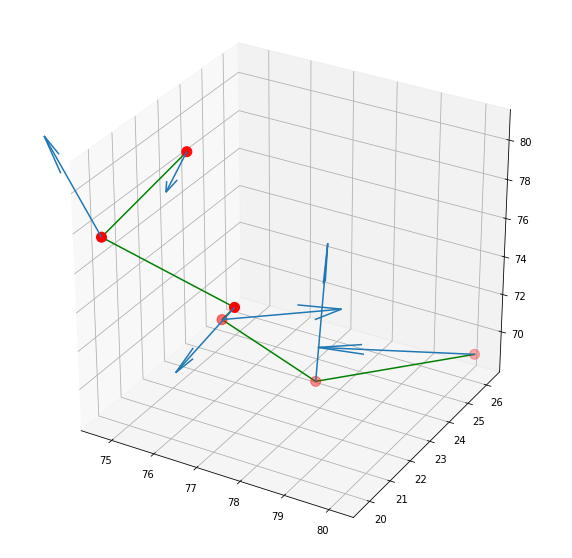

In [ ]:
create3dvectorplot(xvals,yvals,zvals,p538,inclandazi)

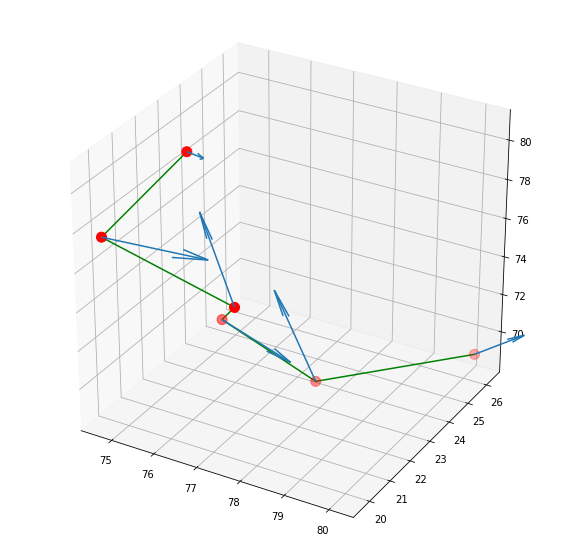

In [ ]:
fig = plt.figure(figsize=(10,10))
ax=fig.add_subplot(111, projection='3d')

ax.scatter(xvals,yvals,zvals, c='r', s=100)
ax.plot(xvals,yvals,zvals, c='g')
ax.quiver(xvals, yvals, zvals, u, v, w, length=0.8)